In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm
from xgboost import XGBClassifier

### a)

In [2]:
# read in data
data = pd.read_table('magic04.data',  sep=',' , header=None)

In [3]:
# split in response and features
X = data.loc[:, 0:(len(data.columns)-2)]
y = data.loc[:, len(data.columns)-1]

In [4]:
# getting the test/training splits
X_train, X_test, Y_train, Y_test = train_test_split(
                                    X, y, test_size=0.2)

In [5]:
# calculating the means and stds of columns of X_train
means = np.mean(X_train)
stds  = np.std(X_train)

# normalize training and testing set
X_train_norm = ((X_train - means) / stds )
X_test_norm  = ((X_test - means) / stds )

### b)

In [6]:
# learn logistic regression model
log_parameters = {'C':[1e-10,3e-10,1e-5,3e-5,1,3,1e5,3e5,1e10,3e10]}
log_reg     = LogisticRegression()
log_reg_clf = GridSearchCV(log_reg, log_parameters)
log_reg_clf.fit(X_train_norm, Y_train)
# get predictions
log_preds = log_reg_clf.predict(X_test_norm)
print(log_reg_clf.best_score_, "\n", log_reg_clf.best_params_)

0.7922581845928895 
 {'C': 100000.0}


In [7]:
# learn lda model
lda       = LinearDiscriminantAnalysis().fit(X_train_norm, Y_train)
# get predictions
lda_preds = lda.predict(X_test_norm)

In [8]:
# learn knn classifier
knn_clf   = KNeighborsClassifier(n_neighbors=5).fit(X_train_norm, Y_train)
# get predictions
knn_preds = knn_clf.predict(X_test_norm)

In [9]:
# learn linear svm classifier
svm_clf   = svm.SVC(C=1.0).fit(X_train_norm, Y_train)
# get predictions
svm_preds = svm_clf.predict(X_test_norm)

In [28]:
# learn linear svm classifier
gaussian_svm_clf   = svm.SVC(kernel='rbf', gamma=0.01).fit(X_train_norm, Y_train)
# get predictions
gaussian_svm_preds = gaussian_svm_clf.predict(X_test_norm)

In [11]:
# fit a random forest tree with 100 trees
# by default, will consider sqrt(p) features at each split, where p is number of cols of feat_train
rf100 = RandomForestClassifier(n_estimators=100, random_state=123).fit(X_train_norm, Y_train)
# predictions for test data
rf100_preds = rf100.predict(X_test_norm)

In [12]:
# fit a gradient boosted tree with 1000 trees
# will use max depth d=1 for each tree, learning rate of 0.01
gb1000 = XGBClassifier(n_estimators=1000, max_depth=1, learning_rate=0.01, random_state=123).fit(X_train_norm, Y_train)

# predictions for test data
gb1000_preds = gb1000.predict(X_test_norm)

### c)

In [22]:
def plot_roc_label_auc(preds, truth, model_name):
    '''
    Desc: This function plots the ROC curve and labels
    the plot with the auc. It also calculates the accuracy of the model (on the test set)
    
    Inputs
    - preds -> model predictions
    - truth -> ground truth
    - model_name -> name of the model in a string
    '''
    
    # convert 'g' and 'h' labels to 1 and -1, respectively
    ## i think you have to convert all labels to 1 and -1 in order for the ROC stuff to work.
    truth_conv = [-1 if true == 'h' else 1 for true in truth] 
    preds_conv = [-1 if pred == 'h' else 1 for pred in preds]
    
    fpr, tpr, _ = roc_curve(preds_conv, truth_conv)
    calc_auc    = auc(fpr, tpr)
    accuracy    = np.sum(preds == truth)/len(truth)
    title = "{} AUC: {}".format(model_name, calc_auc)

    plt.plot(fpr, tpr, label="Accuracy: {}".format(accuracy))
    plt.legend(loc='lower right')    
    plt.title(title)

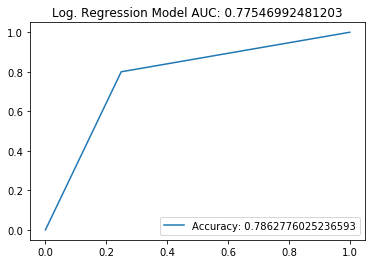

In [23]:
plot_roc_label_auc(log_preds, Y_test, "Log. Regression Model")

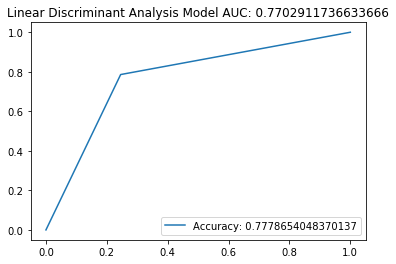

In [24]:
plot_roc_label_auc(lda_preds, Y_test, "Linear Discriminant Analysis Model")

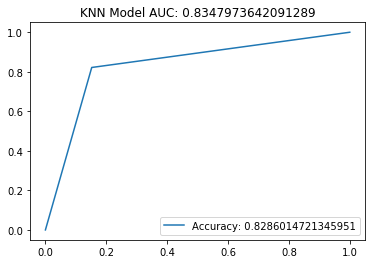

In [25]:
plot_roc_label_auc(knn_preds, Y_test, "KNN Model")

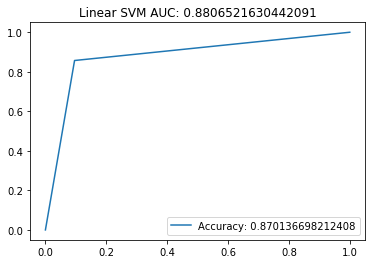

In [26]:
plot_roc_label_auc(svm_preds, Y_test, "Linear SVM")

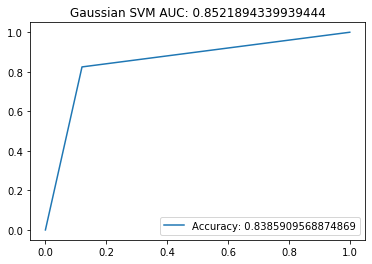

In [29]:
plot_roc_label_auc(gaussian_svm_preds, Y_test, "Gaussian SVM")

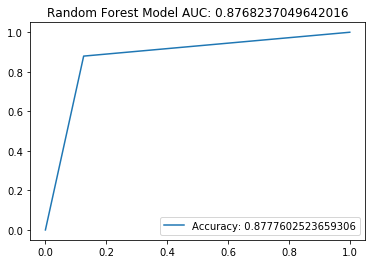

In [32]:
plot_roc_label_auc(rf100_preds, Y_test, "Random Forest Model")

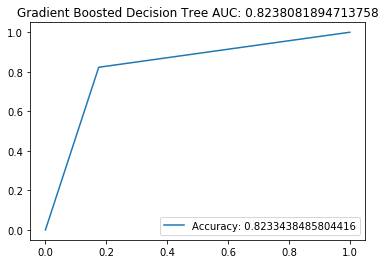

In [33]:
plot_roc_label_auc(gb1000_preds, Y_test, "Gradient Boosted Decision Tree")

<class 'str'>
